# Transfer Learning Tutorial

### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

import torchvision
import torchvision.datasets

import numpy as np
import matplotlib.pyplot as plt

### Compose Transforms

In [2]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.ColorJitter()
])

### Loads the datasets

In [3]:
trainset = torchvision.datasets.ImageFolder("../input/100-bird-species/train", transform = transforms)
validset = torchvision.datasets.ImageFolder("../input/100-bird-species/valid", transform = transforms)
testset = torchvision.datasets.ImageFolder("../input/100-bird-species/test", transform = transforms)

### Define the batchsize

In [4]:
batch_size = 20

### Define the DataLoader

In [5]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size , shuffle = True)
validloader = torch.utils.data.DataLoader(validset , batch_size=batch_size , shuffle = True)
testloader  = torch.utils.data.DataLoader(testset  , batch_size=batch_size)

### Visualize the Dataset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


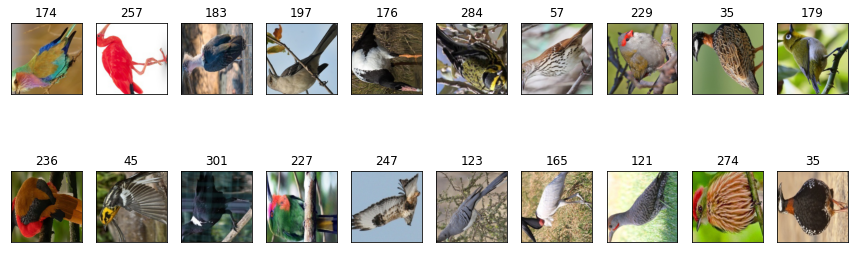

In [6]:
images, labels = iter(trainloader).next()
images, labels = images.numpy() , labels.numpy()

fig = plt.figure(figsize = (15,5))

for i in range(batch_size):
  ax = fig.add_subplot(2 , batch_size/2 , i + 1 , xticks = [] , yticks = [])
  ax.imshow(np.transpose(images[i] , (2,1,0)) , cmap = 'gray')
  ax.set_title(labels[i])

In [7]:
# Single batch
print("Size of trainingset : ", len(trainloader))
print("Size of validset    : ", len(validloader))
print("Size of testset     : ", len(testloader))

Size of trainingset :  2264
Size of validset    :  78
Size of testset     :  78


In [8]:
print("Classes : ", trainset.classes)

Classes :  ['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOB

### Look at the available GPU

In [9]:
!nvidia-smi

Wed Oct 27 17:17:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Define the model

In [10]:
model = torchvision.models.resnet50(pretrained = True)# Use ResNet 50
for param in model.parameters():
  param = param.requires_grad_(False)
model.fc = nn.Linear(model.fc.in_features ,len(trainset.classes))
print("The new fully connected layer is : ",model.fc)
model.cuda() #Moving the model to GPU

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

The new fully connected layer is :  Linear(in_features=2048, out_features=310, bias=True)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Define the Optimizer and Loss functions

In [11]:
import torch.optim as optim

lr = 3e-3
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters() , lr = lr , momentum=0.9)

### Define the training loop

In [12]:
epochs = 1
print_every = 30
min_valid_loss = np.inf
trainloss = []
validloss = []

for i in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for batch_i, (images, target) in enumerate(trainloader):
        images = images.cuda()
        target = target.cuda()
        
        optimizer.zero_grad()
        output = model(images) 
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss = train_loss + ((1/(batch_i+1)) * (loss.data - train_loss))
        trainloss.append(train_loss)
        
    model.eval()
    for batch_i, (images, target) in enumerate(validloader):
        images = images.cuda()
        target = target.cuda()
        
        optimizer.zero_grad()
        output = model(images) 
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        valid_loss = valid_loss + ((1/(batch_i+1)) * (loss.data - valid_loss))
        validloss.append(valid_loss)
        
    print("Epoch: {}, Batch: {}, Training Loss: {}, Vaildation Loss: {}".format(i+1, batch_i+1, train_loss, valid_loss))
    
    if valid_loss < min_valid_loss:
        torch.save(model.state_dict(), "birds.pt")
        print("Validation Loss Change from {} ---> {}".format(min_valid_loss, valid_loss))
        min_valid_loss = valid_loss
    

Epoch: 1, Batch: 78, Training Loss: 2.6639404296875, Vaildation Loss: 0.8904942870140076
Validation Loss Change from inf ---> 0.8904942870140076


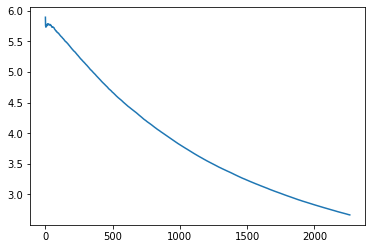

In [13]:
plt.plot(trainloss)

### Test Accuracy

In [14]:
def test(loaders, model, criterion, use_cuda  = True):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [15]:
test(testloader , model , criterion)

Test Loss: 0.724716


Test Accuracy: 93% (1446/1550)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


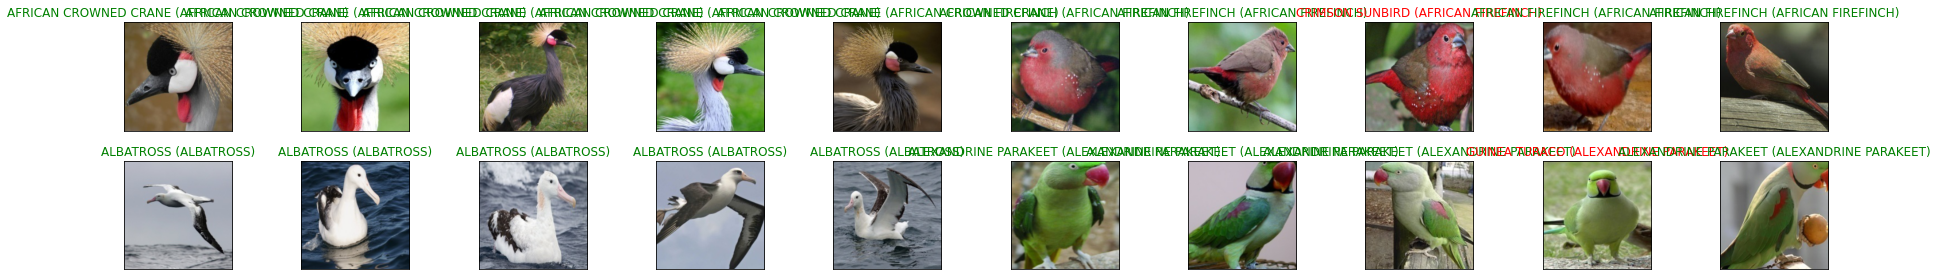

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].transpose(1,2,0)), cmap='gray')
    ax.set_title("{} ({})".format(trainset.classes[preds[idx]], trainset.classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))
plt.tight_layout()

### Inference Time

In [17]:
import time
dataiter = iter(testloader)
images, labels = dataiter.next()
# get predictions
start = time.time()
preds = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
end = time.time()
print("Inference time : {} ms" .format((end - start)*1000))

Inference time : 38.17939758300781 ms


In [18]:
PATH = "birds.pth"
torch.save(model, PATH)

In [19]:
%ls

__notebook__.ipynb  birds.pt  birds.pth
